# Problem 2

Use this notebook to write your code for problem 2b. Some code snippets from the notebook used in Recitation 1 may be useful to you as examples for using numpy and scikit-learn.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

%matplotlib inline

Import Data from CSV File

In [3]:
#==============================================
# TODO: Implement your code for Problem 2 here.
# Use as many cells as you need.
#==============================================

#import data from csv file
import csv
import numpy as np

dest_file = "bv_data.csv"

with open(dest_file, 'r') as dest_f:
    data_iter = csv.reader(dest_f, quotechar = '"')
    data = [data for data in data_iter]
    
data_array = np.asarray(data[1:], dtype = float) # use dtype to ensure it's correct data type

# Skip the pesky "x" and "y" column headers. 
X = data_array[:,0]
y = data_array[:,1]


In [11]:
NUM_FOLD = 5                 #number of folds

N = np.arange(20, 101, 5)    #set N representing number of data points to use
D = [1, 2, 6, 12]            #list of degrees to try

all_train = np.zeros((4, 17)) #array for holding average training error
all_val = np.zeros((4, 17))   #array for holding average validation error
                
#print(N)
for dim in D:      #iterate through different number of dimensions
    for n in N:  #iterate through number of data points
        X_sub = X[0:n]    #subset to test
        y_sub = y[0:n]
        
        kf = KFold(n_splits = NUM_FOLD)
        inds = [ind for ind in kf.split(X_sub, y_sub)]
        
        train_sum = 0
        val_sum = 0
        for i in range(NUM_FOLD):        #train on each of the 5 folds
            
            train, val = inds[i]  #indices of training and validation set for this fold
            vals = np.polyfit(X_sub[train], y_sub[train], dim)
            
            #compute training and validation errors
            train_err = np.mean((np.polyval(vals, X_sub[train]) - y_sub[train]) ** 2)
            val_err = np.mean((np.polyval(vals, X_sub[val]) - y_sub[val]) ** 2)
            
            #add up training and validation error
            train_sum += train_err
            val_sum += val_err
        
        #store average training and validation error across the folds
        all_train[list(D).index(dim), list(N).index(n)] = train_sum/NUM_FOLD
        all_val[list(D).index(dim), list(N).index(n)] = val_sum/NUM_FOLD
        
#print(all_train)
#print(all_val)
        
        
        
    

Plot the Data

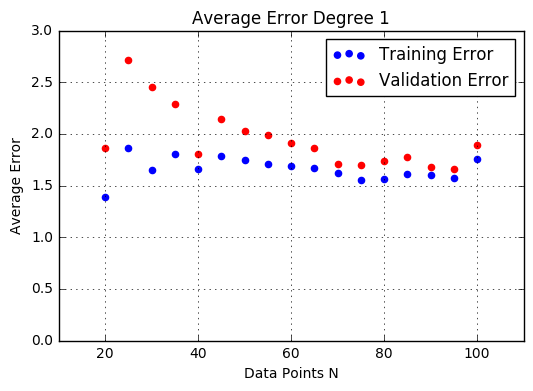

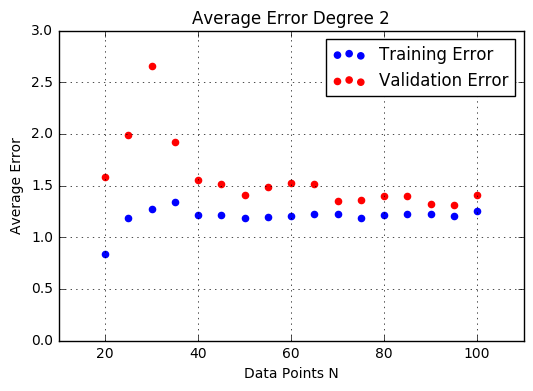

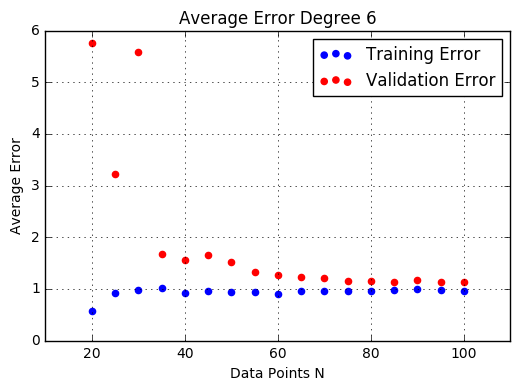

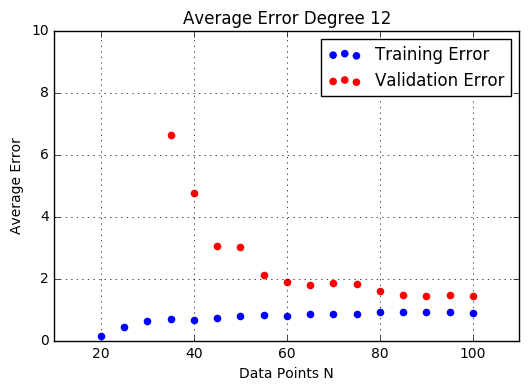

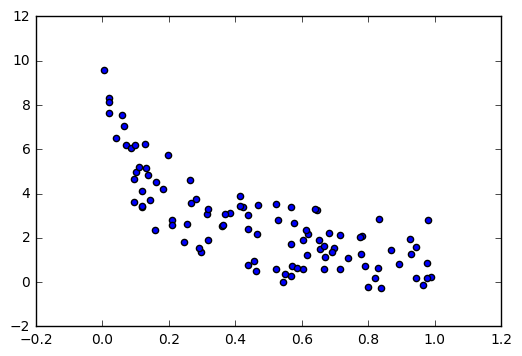

In [40]:


ylims = [3, 3, 6, 10]




for i in range(4):
    plt.figure(i+1)
    plt.scatter(N, all_train[i], label = "Training Error", color = 'b')
    plt.scatter(N, all_val[i], label = "Validation Error", color = 'r')
    plt.grid(True)
    plt.title('Average Error Degree %d' %D[i])
    plt.ylim(0, ylims[i])
    
    plt.legend()
    plt.xlabel("Data Points N")
    plt.ylabel("Average Error")
    plt.savefig(filename = 'p2_%d'%(i + 1))
    
plt.figure('data')
plt.scatter(X, y)
plt.show()